<a href="https://colab.research.google.com/github/TransRadOnc-HIT/multi-omics-SSMP2023/blob/main/Hands_on_4_DeepLearningView.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning View**

---


This Jupyter notebook has been adapted from the **ELIXIR Omics Integration and Systems Biology** workshop, which took place from 6 - 10 September 2021, conducted online. This workshop was intended to provide insights into data-driven hypothesis generation, biological network analysis, and integration techniques for different omics data.

**Workshop Details**:
- **Course Leaders & Staff**: Rui Benfeitas (Stockholm University), Nikolay Oskolkov (Lund University), Ashfaq Ali (Lund University), and others.
- **Original Workshop Information**: [LIXIR Omics Integration and Systems Biology](https://uppsala.instructure.com/courses/52162).
- **Course DOI**: [10.5281/zenodo.4084627](https://doi.org/10.5281/zenodo.4084627).

I am using this material for educational purposes to complement our hand-on sessions. Please reference the course when using this material.

---


### **Setup**


In [ ]:
# Setting the data_path
data_path = "https://raw.githubusercontent.com/TransRadOnc-HIT/multi-omics-SSMP2023/main/data"
# Installing packages
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=3da4b59b929bbf446b8e4e4417024db30b945d0e25d80220333ac324a422f17f
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=42b6569481242dfcc5891df60114d4acd63ac4339bc9b9a4cb716e0febba55ab
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


Let's also make sure we are running the notebook on a GPU. Go to Runtime, choose Change runtime type and then go for T4 GPU.

### **Deep Learning for Data Integration**
Biological and biomedical research has been tremendously benefiting last decade from the technological progress delivering DNA sequence (genomics), gene expression (transcriptomics), protein abundance (proteomics) and many other levels of biological information commonly referred to as OMICs. Despite individual OMICs layers are capable of answering many important biological questions, their combination and consequent synergistic effects from their complementarity promise new insights into behavior of biological systems such as cells, tissues and organisms. Therefore OMICs integration represents the contemporary challenge in Biology and Biomedicine.

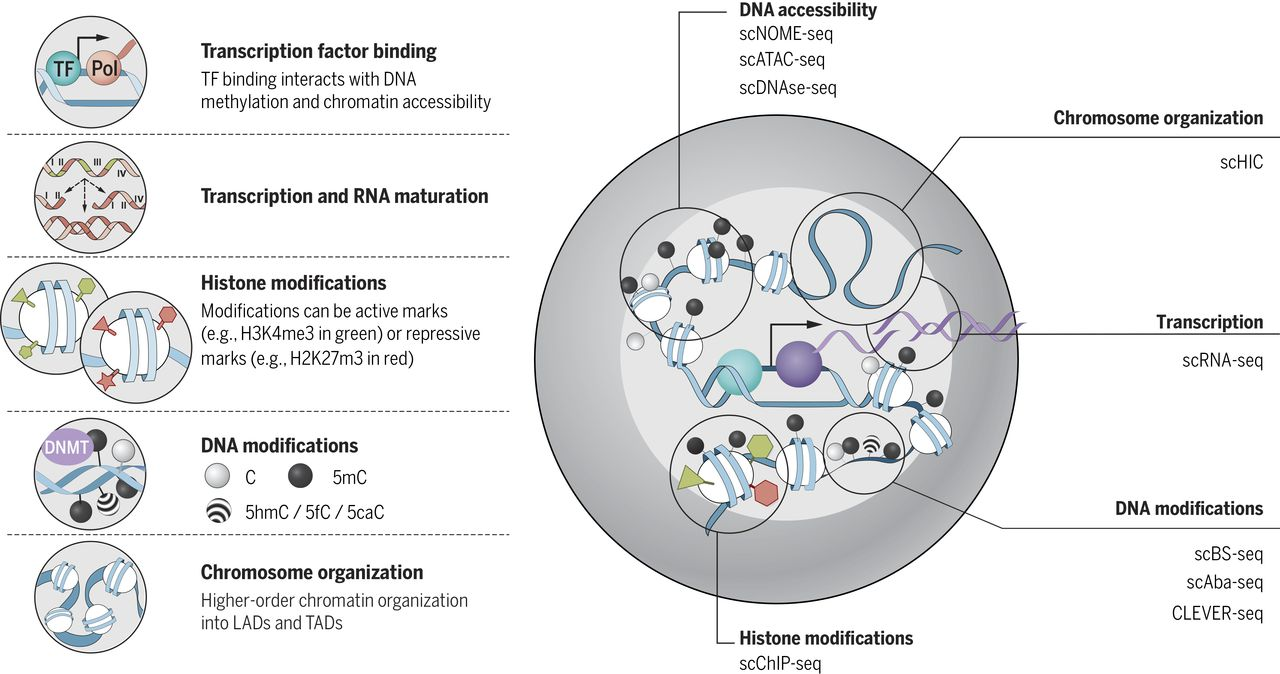

In [ ]:
from IPython.display import Image
Image(f'{data_path}/hands-on4/figures/DeepLearningDataIntegration.jpeg', width=700)

### **Single Cells Make Big Data**
The problem of data integration is not entirely new for Data Science. Imagine we know that a person looks at certain images, reads certain texts and listens to certain music. Image, text and sound are very different types of data, however we can try to combine those types of data in order to build e.g. a better recommender system which achieves a higher accuracy of capturing the interests of the person. As for Biology and Biomedicine, the idea of data integration has only recently arrived here, however it was actively developed with the biological angle resulting in several interesting methodologies such as mixOmics, MOFA, Similarity Network Fusion (SNF), OnPLS/JIVE/DISCO, Bayesian Networks etc.

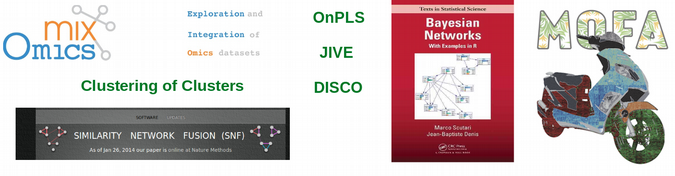

In [ ]:
Image(f'{data_path}/hands-on4/figures/IntegrOmicsMethods.png', width=700)

One problem which all the listed above integrative OMICs methods face is the curse of dimensionality, i.e. inability to work in high-dimensional space with limited number of statistical observations, which is a typical setup for biological data analysis. This is where Single Cell OMICs technologies are very helpful as they deliver hundreds of thousands and even millions of statistical observations (cells) as we discussed in the previous article, and provide thus truly Big Data ideal for integration. It is very exciting that such multi-OMICs single cell technologies as **CITEseq** and **scNMTseq** provide two and three levels of biological information, respectively, from exactly the same cells.

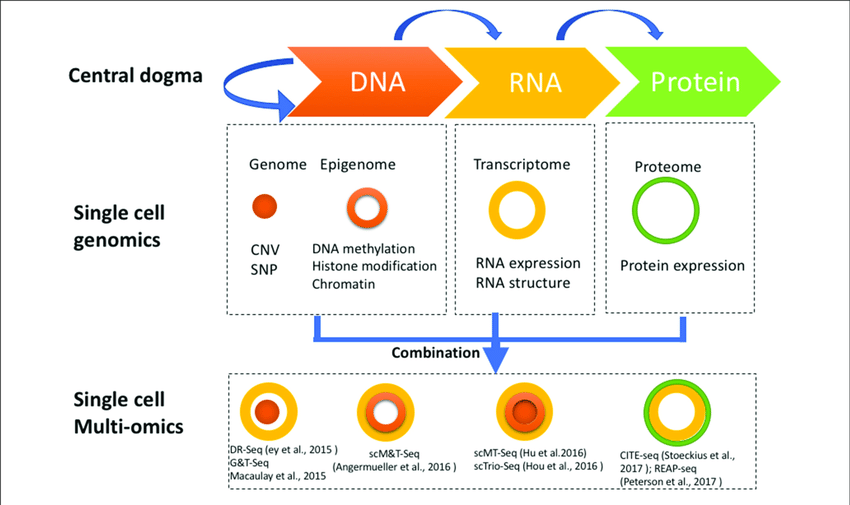

In [ ]:
Image(f'{data_path}/hands-on4/figures/Strategies-for-multi-omics-profiling-of-single-cells-Three-major-types-of-molecules.png',width=700)

### **Integrating CITEseq data with Deep Learning**
Here we will perform unsupervised integration of single cell transcriptomics (scRNAseq) and proteomics (scProteomics) data from CITEseq, 8 617 cord blood mononuclear cells (CBMC), using Autoencoder which is ideally suited for capturing highly non-linear nature of single cell OMICs data. We covered advantages of using Autoencoders for Single Cell Biology in the previous post, but briefly they are related to the fact that single cell analysis is essentially unsupervised. We start by downloading CITEseq data from here, reading them with Pandas and log-transforming, which is equivalent to a mild normalization. As usually, rows are cells, columns are mRNA or protein features, last column corresponds to cell annotation.

In [ ]:
import pandas as pd
pd.read_csv(f'{data_path}/hands-on4/scATACseq.txt', sep ='\t')

,1_100392139,1_100392151,1_100668590,1_100738967,1_100994324,1_100994328,1_100994336,1_100994343,1_101897864,1_102283317,...,Y_6332692,Y_8010569,Y_8010584,Y_8010604,Y_82121171,Y_82121199,Y_82121203,Y_90767964,Y_90825443,cluster
ESC_A02,100,100,50,83,0,0,0,0,100,62,...,100,33,60,40,100,0,0,100,0,1
ESC_A03,100,100,86,88,0,0,0,0,100,0,...,100,0,0,0,0,0,0,0,0,1
ESC_A04,100,100,44,83,11,11,11,22,100,0,...,100,17,17,40,10,65,28,38,0,1
ESC_A05,100,50,45,83,75,0,0,25,100,58,...,100,50,50,0,50,25,25,50,100,1
ESC_A06,67,67,28,88,0,0,25,50,100,100,...,100,17,50,0,33,42,42,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EB_P2F02,100,100,0,100,0,0,0,100,100,100,...,100,0,0,0,0,0,0,0,0,2
EB_P2F12,100,100,0,100,0,0,0,0,100,100,...,100,0,0,0,0,0,0,0,0,3
EB_P2G05,100,100,0,100,0,0,0,0,100,100,...,100,0,0,0,0,0,0,0,0,2
EB_P2G07,100,100,0,100,0,0,0,0,100,100,...,100,0,0,0,0,0,0,0,0,2


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate


scRNAseq = pd.read_csv(f'{data_path}/hands-on4/scRNAseq_CITEseq.txt',sep='\t')
scProteomics = pd.read_csv(f'{data_path}/hands-on4/scProteomics_CITEseq.txt',sep='\t')

X_scRNAseq = scRNAseq.values[:,0:(scRNAseq.shape[1]-1)]
Y_scRNAseq = scRNAseq.values[:,scRNAseq.shape[1]-1]
X_scProteomics = scProteomics.values[:,0:(scProteomics.shape[1]-1)]
Y_scProteomics = scProteomics.values[:,scProteomics.shape[1]-1]

X_scRNAseq = np.log(X_scRNAseq + 1)
X_scProteomics = np.log(X_scProteomics + 1)
print('scRNAseq dimensions: ' + str(X_scRNAseq.shape))
print('scProteomics dimensions: ' + str(X_scProteomics.shape))

scRNAseq dimensions: (8617, 976)
scProteomics dimensions: (8617, 10)


Let us display tSNE embeddings of individual scRNAseq and scProteomics layers before performing the integration step.

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 8617 samples in 0.007s...
[t-SNE] Computed neighbors for 8617 samples in 4.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8617
[t-SNE] Computed conditional probabilities for sample 2000 / 8617
[t-SNE] Computed conditional probabilities for sample 3000 / 8617
[t-SNE] Computed conditional probabilities for sample 4000 / 8617
[t-SNE] Computed conditional probabilities for sample 5000 / 8617
[t-SNE] Computed conditional probabilities for sample 6000 / 8617
[t-SNE] Computed conditional probabilities for sample 7000 / 8617
[t-SNE] Computed conditional probabilities for sample 8000 / 8617
[t-SNE] Computed conditional probabilities for sample 8617 / 8617
[t-SNE] Mean sigma: 0.739933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.432953
[t-SNE] KL divergence after 1000 iterations: 1.441087


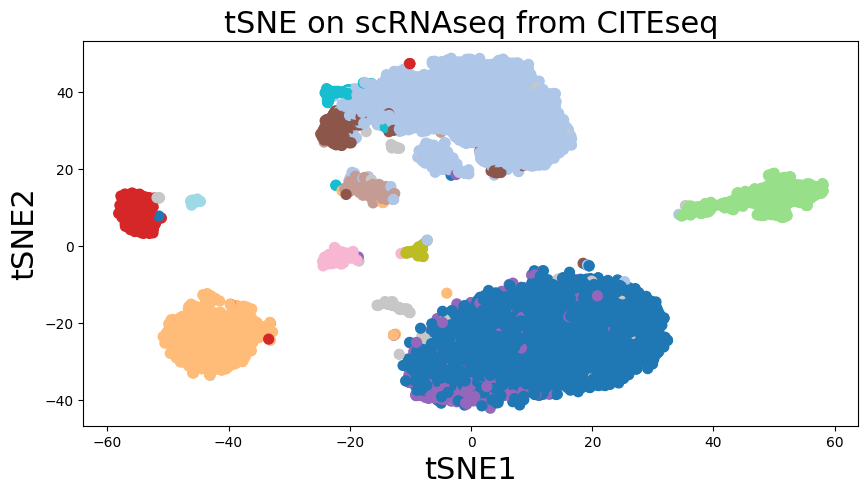

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 20).fit_transform(X_scRNAseq)

model_tsne_scRNAseq = TSNE(learning_rate = 200, n_components = 2, random_state = 123,
                       perplexity = 90, n_iter = 1000, verbose = 1)
tsne_scRNAseq = model_tsne_scRNAseq.fit_transform(X_reduced)

plt.figure(figsize = (10,5))
plt.scatter(tsne_scRNAseq[:, 0], tsne_scRNAseq[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 50, )
plt.title('tSNE on scRNAseq from CITEseq', fontsize = 22)
plt.xlabel("tSNE1", fontsize = 22)
plt.ylabel("tSNE2", fontsize = 22)
plt.show()

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 8617 samples in 0.015s...
[t-SNE] Computed neighbors for 8617 samples in 1.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8617
[t-SNE] Computed conditional probabilities for sample 2000 / 8617
[t-SNE] Computed conditional probabilities for sample 3000 / 8617
[t-SNE] Computed conditional probabilities for sample 4000 / 8617
[t-SNE] Computed conditional probabilities for sample 5000 / 8617
[t-SNE] Computed conditional probabilities for sample 6000 / 8617
[t-SNE] Computed conditional probabilities for sample 7000 / 8617
[t-SNE] Computed conditional probabilities for sample 8000 / 8617
[t-SNE] Computed conditional probabilities for sample 8617 / 8617
[t-SNE] Mean sigma: 0.471750
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.797546
[t-SNE] KL divergence after 1000 iterations: 1.192158


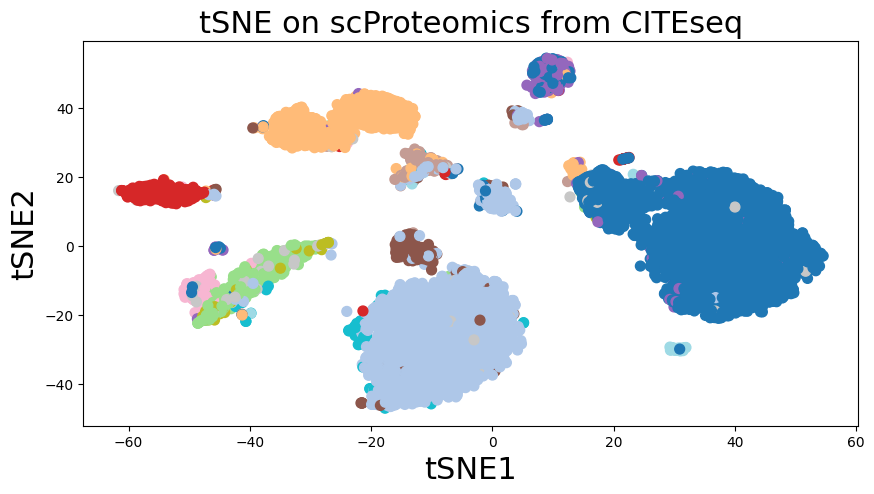

In [ ]:
model_tsne_scProteomics = TSNE(learning_rate = 200, n_components = 2, random_state = 123,
                       perplexity = 90, n_iter = 1000, verbose = 1)
tsne_scProteomics = model_tsne_scProteomics.fit_transform(X_scProteomics)

plt.figure(figsize = (10,5))
plt.scatter(tsne_scProteomics[:, 0], tsne_scProteomics[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 50)
plt.title('tSNE on scProteomics from CITEseq', fontsize = 22)
plt.xlabel("tSNE1", fontsize = 22)
plt.ylabel("tSNE2", fontsize = 22)
plt.show()

Now we are going to build an Autoencoder model with 4 hidden layers using Keras functional API. The Autoencoder has two inputs, one for each layer of information, i.e. scRNAseq and scProteomics, and corresponding two outputs which aim to reconstruct the inputs. The two input layers are separately linearly transformed in the first hidden layer (equivalent to PCA dimensionality reduction) before they are concatenated in the second hidden layer. Finally, the merged OMICs are processed through the bottleneck of the Autoencoder, and finally the dimensions are gradually reconstructed to the initial ones according to the “butterfly” symmetry typical for Autoencoders.

In the code for the Autoencoder below, it is important to note that the first hidden layer imposes severe dimensionality reduction on the scRNAseq from 977 to 50 genes, while it leaves the scProteomics almost untouched, i.e. reduces dimensions from 11 to 10. The bottleneck further reduces the total 60 dimensions after concatenation down to 50 latent variables which represent combinations of both mRNA and protein features.

In [ ]:
# Input Layer
ncol_scRNAseq = X_scRNAseq.shape[1]
input_dim_scRNAseq = Input(shape = (ncol_scRNAseq, ), name = "scRNAseq")
ncol_scProteomics = X_scProteomics.shape[1]
input_dim_scProteomics = Input(shape = (ncol_scProteomics, ), name = "scProteomics")

# Dimensions of Encoder for each OMIC
encoding_dim_scRNAseq = 50
encoding_dim_scProteomics = 10

# Encoder layer for each OMIC
encoded_scRNAseq = Dense(encoding_dim_scRNAseq, activation = 'elu',
                         name = "Encoder_scRNAseq")(input_dim_scRNAseq)
encoded_scProteomics = Dense(encoding_dim_scProteomics, activation = 'linear',
                             name = "Encoder_scProteomics")(input_dim_scProteomics)

# Merging Encoder layers from different OMICs
merge = concatenate([encoded_scRNAseq, encoded_scProteomics])

# Bottleneck compression
bottleneck = Dense(50, kernel_initializer = 'uniform', activation = 'linear',
                   name = "Bottleneck")(merge)

#Inverse merging
merge_inverse = Dense(encoding_dim_scRNAseq + encoding_dim_scProteomics,
                      activation = 'elu', name = "Concatenate_Inverse")(bottleneck)

# Decoder layer for each OMIC
decoded_scRNAseq = Dense(ncol_scRNAseq, activation = 'linear',
                         name = "Decoder_scRNAseq")(merge_inverse)
decoded_scProteomics = Dense(ncol_scProteomics, activation = 'linear',
                             name = "Decoder_scProteomics")(merge_inverse)

# Combining Encoder and Decoder into an Autoencoder model
autoencoder = Model([input_dim_scRNAseq, input_dim_scProteomics], [decoded_scRNAseq, decoded_scProteomics])

# Compile Autoencoder
autoencoder.compile(optimizer = 'adam',
                    loss={'Decoder_scRNAseq': 'mean_squared_error',
                          'Decoder_scProteomics': 'mean_squared_error'})
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 scRNAseq (InputLayer)       [(None, 976)]                0         []                            
                                                                                                  
 scProteomics (InputLayer)   [(None, 10)]                 0         []                            
                                                                                                  
 Encoder_scRNAseq (Dense)    (None, 50)                   48850     ['scRNAseq[0][0]']            
                                                                                                  
 Encoder_scProteomics (Dens  (None, 10)                   110       ['scProteomics[0][0]']        
 e)                                                                                           

A very handy thing here is that we can assign different loss functions to OMICs coming from different statistical distributions, e.g. combining categorical and continuous data we can apply categorical cross entropy and mean squared error, respectively. Another great thing about data integration via Autoencoders is that all OMICs know about each other as the weights for each node / feature are updated through back propagation in the context of each other. Finally, let us train the Autoencoder and feed the bottleneck into tSNE for visualization:

Epoch 1/10
54/54 [==============================] - 9s 12ms/step - loss: 5.5463 - Decoder_scRNAseq_loss: 0.2502 - Decoder_scProteomics_loss: 5.2961 - val_loss: 0.7939 - val_Decoder_scRNAseq_loss: 0.0829 - val_Decoder_scProteomics_loss: 0.7110
Epoch 2/10
54/54 [==============================] - 0s 7ms/step - loss: 0.6493 - Decoder_scRNAseq_loss: 0.1832 - Decoder_scProteomics_loss: 0.4661 - val_loss: 0.4496 - val_Decoder_scRNAseq_loss: 0.0717 - val_Decoder_scProteomics_loss: 0.3779
Epoch 3/10
54/54 [==============================] - 0s 7ms/step - loss: 0.4389 - Decoder_scRNAseq_loss: 0.1145 - Decoder_scProteomics_loss: 0.3244 - val_loss: 0.3588 - val_Decoder_scRNAseq_loss: 0.0632 - val_Decoder_scProteomics_loss: 0.2955
Epoch 4/10
54/54 [==============================] - 0s 7ms/step - loss: 0.3128 - Decoder_scRNAseq_loss: 0.0694 - Decoder_scProteomics_loss: 0.2434 - val_loss: 0.2817 - val_Decoder_scRNAseq_loss: 0.0578 - val_Decoder_scProteomics_loss: 0.2239
Epoch 5/10
54/54 [=============

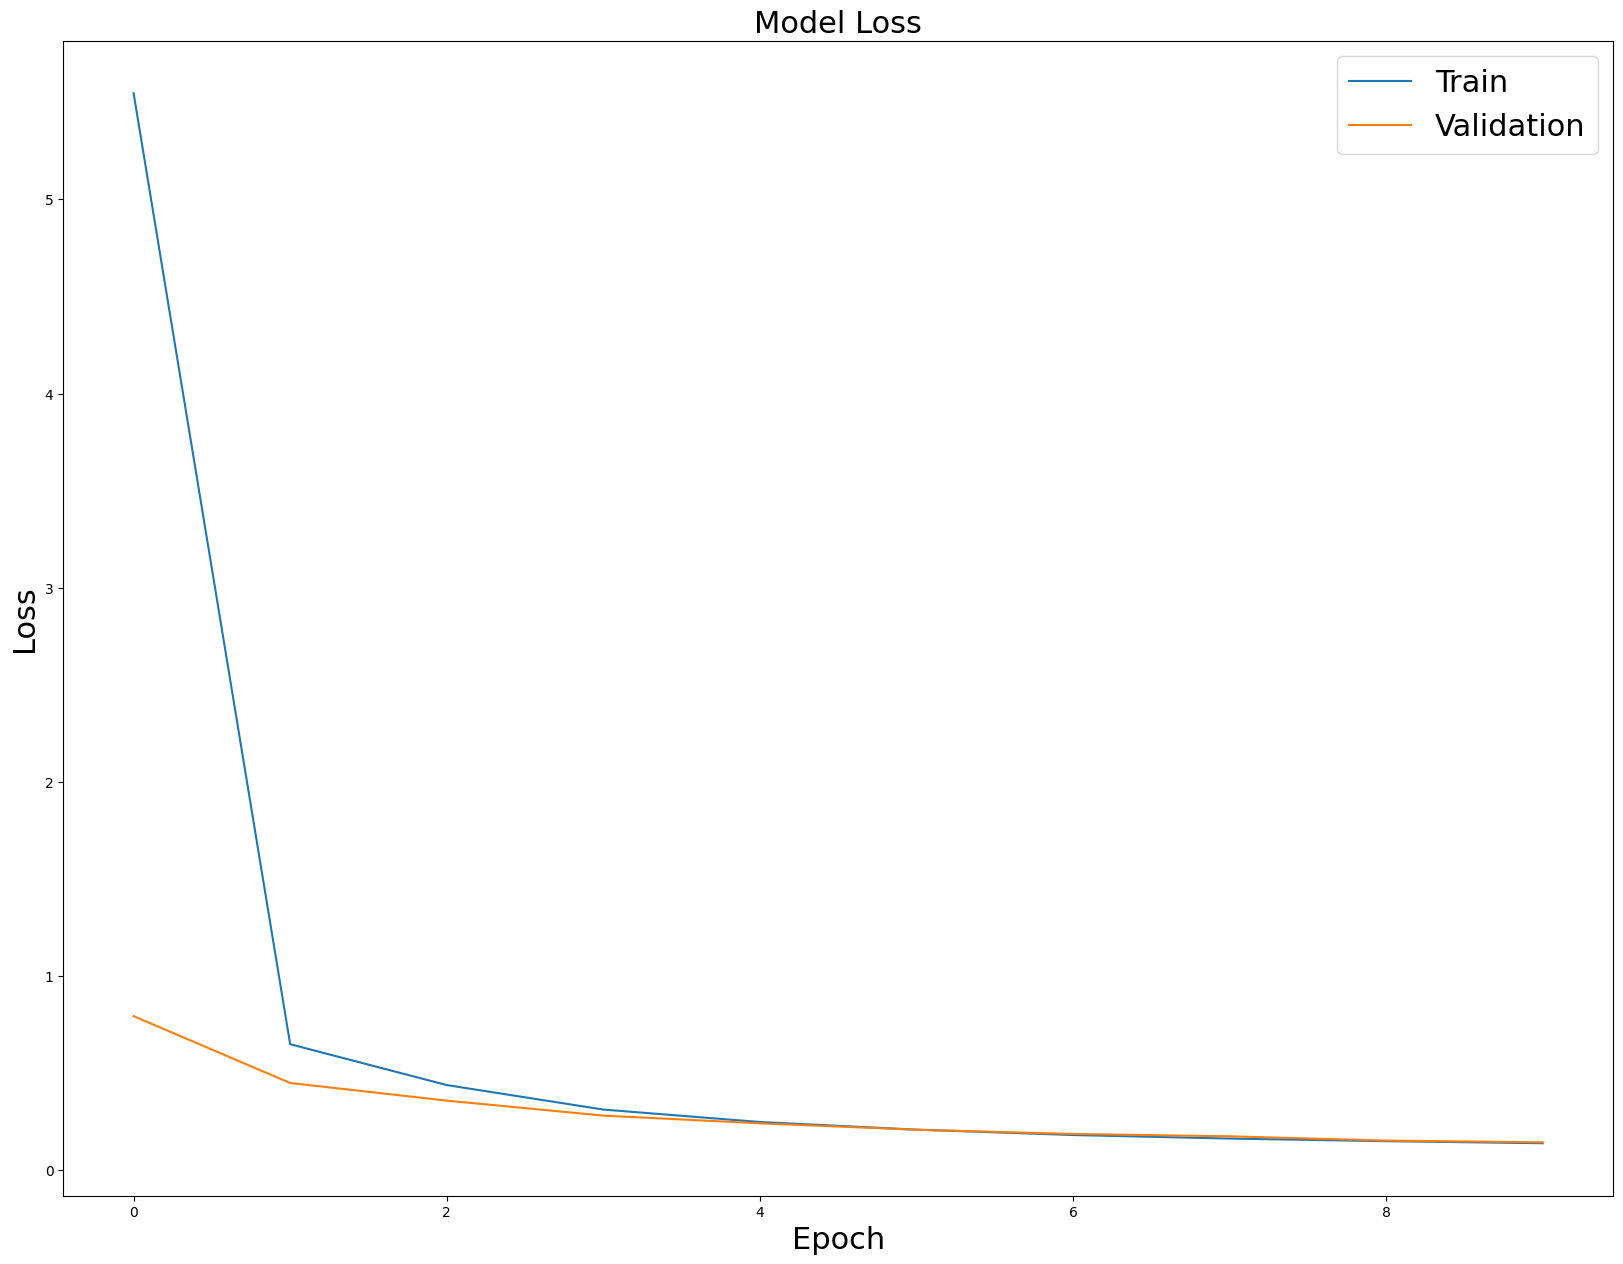

270/270 [==============================] - 1s 2ms/step
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 8617 samples in 0.001s...
[t-SNE] Computed neighbors for 8617 samples in 1.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8617
[t-SNE] Computed conditional probabilities for sample 2000 / 8617
[t-SNE] Computed conditional probabilities for sample 3000 / 8617
[t-SNE] Computed conditional probabilities for sample 4000 / 8617
[t-SNE] Computed conditional probabilities for sample 5000 / 8617
[t-SNE] Computed conditional probabilities for sample 6000 / 8617
[t-SNE] Computed conditional probabilities for sample 7000 / 8617
[t-SNE] Computed conditional probabilities for sample 8000 / 8617
[t-SNE] Computed conditional probabilities for sample 8617 / 8617
[t-SNE] Mean sigma: 0.320701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.930786
[t-SNE] KL divergence after 1000 iterations: 1.137291


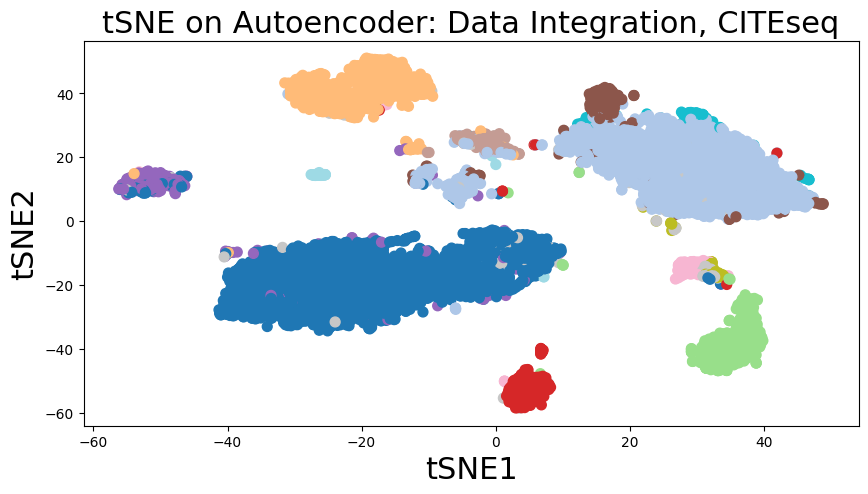

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Autoencoder training
estimator = autoencoder.fit([X_scRNAseq, X_scProteomics],
                            [X_scRNAseq, X_scProteomics],
                            epochs = 10, batch_size = 128,
                            validation_split = 0.2, shuffle = True, verbose = 1)
print("Training Loss: ",estimator.history['loss'][-1])
print("Validation Loss: ",estimator.history['val_loss'][-1])

plt.figure(figsize = (10,5))
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model Loss', fontsize = 22)
plt.ylabel('Loss', fontsize = 22)
plt.xlabel('Epoch', fontsize = 22)
plt.legend(['Train','Validation'], loc = 'upper right', fontsize = 22)
plt.show()

# Encoder model
encoder = Model([input_dim_scRNAseq, input_dim_scProteomics], bottleneck)
bottleneck_representation = encoder.predict([X_scRNAseq, X_scProteomics])

# tSNE on Autoencoder bottleneck representation
model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state = 123,
                       perplexity = 90, n_iter = 1000, verbose = 1)
tsne_auto = model_tsne_auto.fit_transform(bottleneck_representation)

plt.figure(figsize = (10,5))
plt.scatter(tsne_auto[:, 0], tsne_auto[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 50)
plt.title('tSNE on Autoencoder: Data Integration, CITEseq', fontsize = 22)
plt.xlabel("tSNE1", fontsize = 22)
plt.ylabel("tSNE2", fontsize = 22)
plt.show()

Comparing the tSNE plots obtained using individual OMICs with the tSNE on the bottleneck of the Autoencoder that combines the data, we can immediately see that the integration somewhat averages and reinforces the individual OMICs. For example, the purple cluster would be hard to discover using the scRNAseq data alone as it is not distinct from the blue cell population, however after integration the purple group of cells is easily distinguishable. This is the power of data integration!

### **Integrating scNMTseq data with Deep Learning**
While CITEseq includes two single cell levels of information (transcriptomics and proteomics), another fantastic technology, scNMTseq, delivers three OMICs from the same biological cells: 1) transcriptomics (scRNAseq), 2) methylation pattern (scBSseq), and 3) open chromatin regions (scATACseq). The raw data can be downloaded from here.

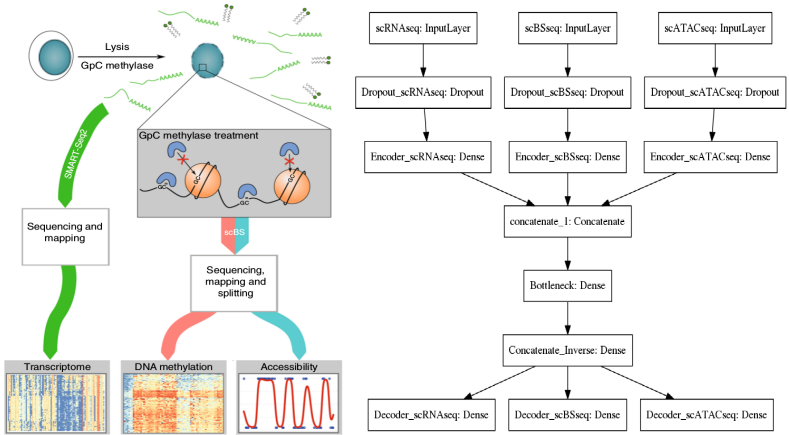

In [ ]:
from IPython.display import Image
Image(f'{data_path}/hands-on4/figures/scNMT_Method.png', width=700)

The architecture of the Autoencoder is analogous to the one used for CITEseq with only one peculiarity: Dropout regularization is used on the input layers. This is due to the fact that we have only ~120 cells sequenced while the dimensionality of the feature space is tens of thousands, so we need to apply regularization to overcome the curse of dimensionality. Note that this was not necessary for CITEseq where we had ~8K cells and ~1K features, so exactly opposite situation. Nevertheless, overall scNMTseq is not an easy case for data integration, I firmly believe though that this is just the beginning of single cell multi-OMICs era and many more cells will arrive soon from this exciting technology, so it is better to be prepared.

In [ ]:
import os
import numpy as np
import pandas as pd
from umap import UMAP
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input, Dense, Dropout

################## READ AND TRANSFORM DATA ##################
scRNAseq = pd.read_csv(f'{data_path}/hands-on4/scRNAseq.txt',sep='\t')
scBSseq = pd.read_csv(f'{data_path}/hands-on4/scBSseq.txt',sep='\t')
scATACseq = pd.read_csv(f'{data_path}/hands-on4/scATACseq.txt',sep='\t')

X_scRNAseq = scRNAseq.values[:,0:(scRNAseq.shape[1]-1)]
Y_scRNAseq = scRNAseq.values[:,scRNAseq.shape[1]-1]
X_scBSseq = scBSseq.values[:,0:(scBSseq.shape[1]-1)]
Y_scBSseq = scBSseq.values[:,scBSseq.shape[1]-1]
X_scATACseq = scATACseq.values[:,0:(scATACseq.shape[1]-1)]
Y_scATACseq = scATACseq.values[:,scATACseq.shape[1]-1]

X_scRNAseq = np.log(X_scRNAseq + 1)
X_scBSseq = np.log(X_scBSseq + 1)
X_scATACseq = np.log(X_scATACseq + 1)

print('scRNAseq dimensions: ' + str(X_scRNAseq.shape))
print('scBSseq dimensions: ' + str(X_scBSseq.shape))
print('scATACseq dimensions: ' + str(X_scATACseq.shape))

scRNAseq dimensions: (113, 12313)
scBSseq dimensions: (113, 8574)
scATACseq dimensions: (113, 11799)


Again, let us display the tSNE embeddings of the individual scRNAseq layers from the scNMT data set before integrating it together with scBSseq and scATACseq with Autoencoder.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.012s...
[t-SNE] Computed neighbors for 113 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 10.616875
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.969875
[t-SNE] KL divergence after 1000 iterations: 0.315229


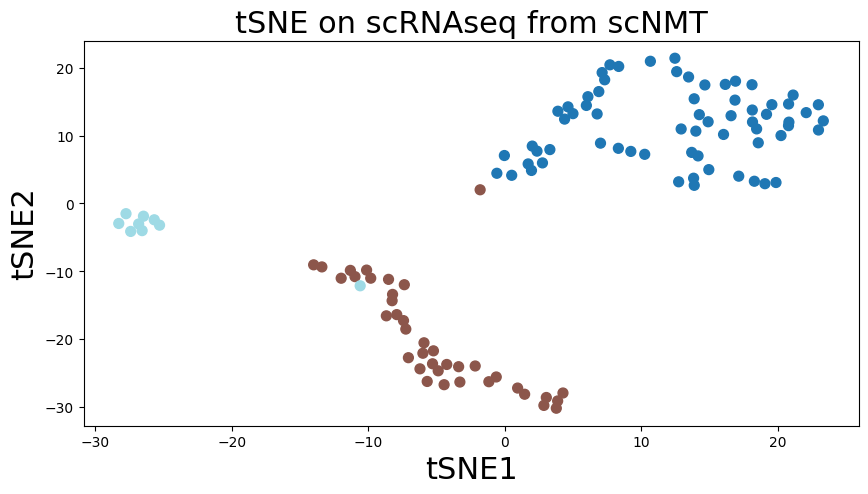

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 5).fit_transform(X_scRNAseq)

model_tsne_scRNAseq = TSNE(n_components = 2, random_state = 123, perplexity = 10, n_iter = 1000, verbose = 1)
tsne_scRNAseq = model_tsne_scRNAseq.fit_transform(X_reduced)

plt.figure(figsize = (10,5))
plt.scatter(tsne_scRNAseq[:, 0], tsne_scRNAseq[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 50)
plt.title('tSNE on scRNAseq from scNMT', fontsize = 22)
plt.xlabel("tSNE1", fontsize = 22)
plt.ylabel("tSNE2", fontsize = 22)
plt.show()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 scRNAseq (InputLayer)       [(None, 12313)]              0         []                            
                                                                                                  
 scBSseq (InputLayer)        [(None, 8574)]               0         []                            
                                                                                                  
 scATACseq (InputLayer)      [(None, 11799)]              0         []                            
                                                                                                  
 Dropout_scRNAseq (Dropout)  (None, 12313)                0         ['scRNAseq[0][0]']            
                                                                                            

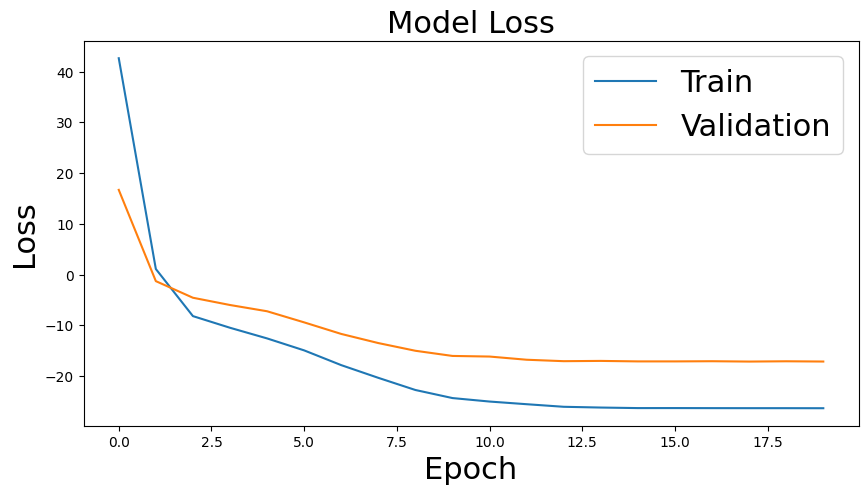

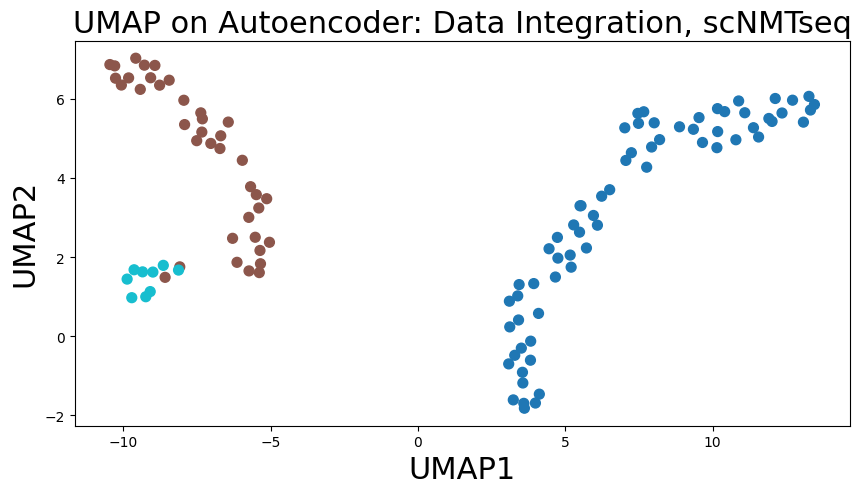

In [ ]:
######################## AUTOENCODER ########################
# Input Layer
ncol_scRNAseq = X_scRNAseq.shape[1]
input_dim_scRNAseq = Input(shape = (ncol_scRNAseq, ), name = "scRNAseq")
ncol_scBSseq = X_scBSseq.shape[1]
input_dim_scBSseq = Input(shape = (ncol_scBSseq, ), name = "scBSseq")
ncol_scATACseq = X_scATACseq.shape[1]
input_dim_scATACseq = Input(shape = (ncol_scATACseq, ), name = "scATACseq")

encoding_dim_scRNAseq = 10
encoding_dim_scBSseq = 10
encoding_dim_scATACseq = 10

# Dropout on Input Layer
dropout_scRNAseq = Dropout(0.2, name = "Dropout_scRNAseq")(input_dim_scRNAseq)
dropout_scBSseq = Dropout(0.2, name = "Dropout_scBSseq")(input_dim_scBSseq)
dropout_scATACseq = Dropout(0.2, name = "Dropout_scATACseq")(input_dim_scATACseq)

# Encoder layer for each OMIC
encoded_scRNAseq = Dense(encoding_dim_scRNAseq, activation = 'elu',
                         name = "Encoder_scRNAseq")(dropout_scRNAseq)
encoded_scBSseq = Dense(encoding_dim_scBSseq, activation = 'elu',
                        name = "Encoder_scBSseq")(dropout_scBSseq)
encoded_scATACseq = Dense(encoding_dim_scATACseq, activation = 'elu',
                          name = "Encoder_scATACseq")(dropout_scATACseq)

# Merging Encoder layers from different OMICs
merge = concatenate([encoded_scRNAseq, encoded_scBSseq, encoded_scATACseq])

# Bottleneck compression
bottleneck = Dense(5, kernel_initializer = 'uniform', activation = 'elu',
                   name = "Bottleneck")(merge)

#Inverse merging
merge_inverse = Dense(encoding_dim_scRNAseq + encoding_dim_scBSseq +
                      encoding_dim_scATACseq,
                      activation = 'elu', name = "Concatenate_Inverse")(bottleneck)

# Decoder layer for each OMIC
decoded_scRNAseq = Dense(ncol_scRNAseq, activation = 'elu',
                         name = "Decoder_scRNAseq")(merge_inverse)
decoded_scBSseq = Dense(ncol_scBSseq, activation = 'elu',
                        name = "Decoder_scBSseq")(merge_inverse)
decoded_scATACseq = Dense(ncol_scATACseq, activation = 'elu',
                          name = "Decoder_scATACseq")(merge_inverse)

# Combining Encoder and Decoder into an Autoencoder model
autoencoder = Model([input_dim_scRNAseq, input_dim_scBSseq, input_dim_scATACseq],
                    [decoded_scRNAseq, decoded_scBSseq, decoded_scATACseq])

# Compile Autoencoder
autoencoder.compile(optimizer = 'adam',
                    loss={'Decoder_scRNAseq': 'mean_squared_error',
                          'Decoder_scBSseq': 'binary_crossentropy',
                          'Decoder_scATACseq': 'binary_crossentropy'})
autoencoder.summary()

# Autoencoder training
estimator = autoencoder.fit([X_scRNAseq, X_scBSseq, X_scATACseq],
                            [X_scRNAseq, X_scBSseq, X_scATACseq], epochs = 20,
                            batch_size = 16, validation_split = 0.2,
                            shuffle = True, verbose = 0)
print("Training Loss: ",estimator.history['loss'][-1])
print("Validation Loss: ",estimator.history['val_loss'][-1])

plt.figure(figsize = (10,5))
plt.plot(estimator.history['loss']); plt.plot(estimator.history['val_loss'])
plt.title('Model Loss', fontsize = 22); plt.ylabel('Loss', fontsize = 22); plt.xlabel('Epoch', fontsize = 22)
plt.legend(['Train','Validation'], loc = 'upper right', fontsize = 22)

# Encoder model
encoder = Model([input_dim_scRNAseq, input_dim_scBSseq, input_dim_scATACseq], bottleneck)
bottleneck_representation = encoder.predict([X_scRNAseq, X_scBSseq, X_scATACseq])

############### UNIFORM MANIFOLD APPROXIMATION AND PROJECTION (UMAP) ###############
model_umap = UMAP(n_neighbors = 10, min_dist = 0.5, n_components = 2)
umap = model_umap.fit_transform(bottleneck_representation)

plt.figure(figsize = (10,5))
plt.scatter(umap[:, 0], umap[:, 1], c = Y_scRNAseq, cmap = 'tab10', s = 50)
plt.title('UMAP on Autoencoder: Data Integration, scNMTseq', fontsize = 22)
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()

Here out of curiosity I fed the bottleneck of the Autoencoder that combines the three scNMTseq OMICs into Uniform Manifold Approximation and Projection (UMAP) non-linear dimensionality reduction technique which seems to outperform tSNE in sense of scalability for large amounts of data. We can immediately see that the homogeneous in sense of gene expression brown cluster splits into two clusters when scRNAseq is combined with epigenetics information from the same cells (scBSseq and scATACseq). Therefore it seems that we have captured a new heterogeneity between cells which was hidden when looking only at gene expression scRNAseq data. Can this be a new way of classifying cells across populations by using the whole complexity of their biology? If so, then the question comes: what is a cell population or cell type? I do not know the answer for this question.


### **Summary**
Here we have learnt that multiple sources of molecular and clinical information are becoming common in Biology and Biomedicine thanks to the recent technological progress. Therefore data integration is a logical next step which provides a more comprehensive understanding of the biological processes by utilizing the whole complexity of the data. Deep Learning framework is ideally suited for data integration due to its truly “integrative” updating of parameters through back propagation when multiple data types learn information from each other. I showed that data integration can result in discoveries of novel patterns in the data which were not previously seen in the individual data types.